In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

(2040, 2046, 3)


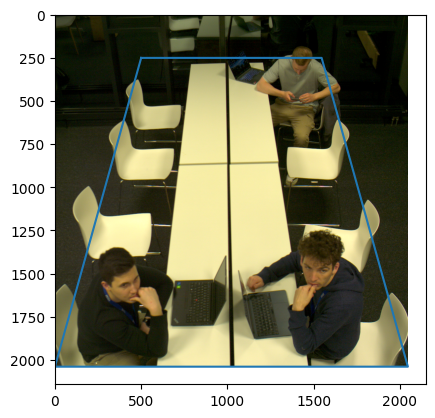

In [9]:
img = cv.imread('../data/raw_data/saved_pypylon_img_1714249709.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = np.rot90(img, 1)
print(img.shape)
plt.imshow(img)
plt.plot([500,0,2046,1546,500],[250,2040,2040,250,250]);

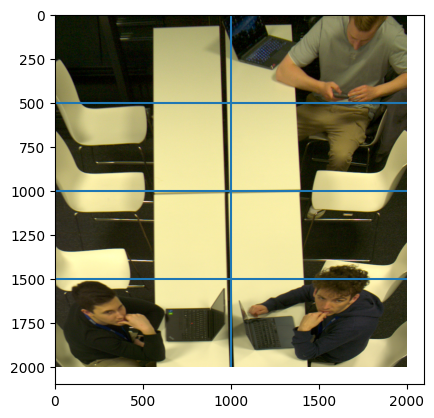

In [10]:
pts1 = np.float32([[500,250],[1546,250],[0,2040],[2046,2040]])
pts2 = np.float32([[0,0],[2000,0],[0,2000],[2000,2000]])
 
M = cv.getPerspectiveTransform(pts1,pts2)
 
img_warped = cv.warpPerspective(img,M,(0,2000))
img_warped = img_warped[0:2000, 0:2000]
plt.imshow(img_warped)
plt.hlines([500, 1000, 1500],0,2000)
plt.vlines(1000,0,2000)
plt.show()

In [11]:
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
target_brightness = gray_image.mean()

average_color_per_row = np.average(img, axis=0)
target_color = np.average(average_color_per_row, axis=0)

print(target_brightness, target_color)

86.03126161999502 [98.98132367 95.42257681 62.650535  ]


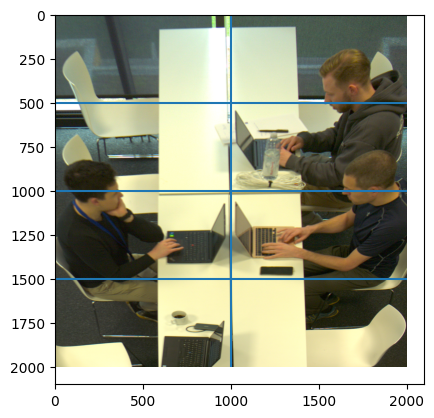

In [12]:
img = cv.imread('../images/saved_pypylon_img_1714289587.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = np.rot90(img, 1)
pts1 = np.float32([[500,250],[1546,250],[0,2040],[2046,2040]])
pts2 = np.float32([[0,0],[2000,0],[0,2000],[2000,2000]])
 
M = cv.getPerspectiveTransform(pts1,pts2)
 
img_warped = cv.warpPerspective(img,M,(0,2000))
img_warped = img_warped[0:2000, 0:2000]
plt.imshow(img_warped)
plt.hlines([500, 1000, 1500],0,2000)
plt.vlines(1000,0,2000)
plt.show()

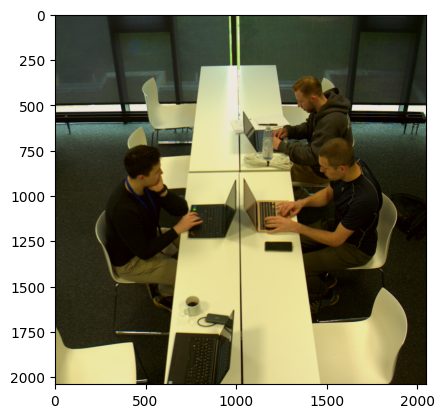

In [13]:
def adjust_lighting(img, target_brightness=86.031, target_color=[98.981, 95.423, 62.651]):
    gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    current_brightness = gray_image.mean()

    brightness_offset = target_brightness - current_brightness
    img = cv.add(img, np.array([brightness_offset]))

    average_color_per_row = np.average(img, axis=0)
    current_color = np.average(average_color_per_row, axis=0)

    color_diff = target_color - current_color

    adjusted_image = cv.add(img, np.array([color_diff]))
    return adjusted_image

adjusted_image = adjust_lighting(img)
plt.imshow(adjusted_image)

In [14]:
# import os
# import sys
# sys.path.append(os.path.join(os.path.dirname('..'), '..'))
# from scripts.transform_split import process_folder

# process_folder('../data/raw_data','../data/processed_data')